In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA
import pandas as pd
import torch
from plotting_utils import interleave_scatter
try:
    from geomloss import SamplesLoss
except ModuleNotFoundError:
    !pip install geomloss
    from geomloss import SamplesLoss
from fca.projections import explained_variance 

kwargs = { "loss": "sinkhorn", "p": 2, "blur": 0.05, }
loss_fn = SamplesLoss(**kwargs)
def get_emd(X,Y):
    return loss_fn(X,Y).item()

In [2]:
top_data_dir = "/data2/grantsrb/rep_div/"
pt_files = []
for f in os.listdir(top_data_dir):
    if ".p" in f:
        print(len(pt_files), f)
        pt_files.append(f)

0 mean_intervention_vectors_debug.pt
1 mean_intervention_vectors.pt


In [3]:
fidx = 1
data_path = os.path.join(
    top_data_dir, pt_files[fidx]
)
data = torch.load(data_path)
data.keys()

/tmp/ipykernel_786544/787120865.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(data_path)


dict_keys(['means', 'before_vectors', 'after_vectors', 'intervention_vectors', 'model_name', 'vocab_tag', 'num_mean_samples', 'num_test_samples'])

In [4]:
base_hstates = data["before_vectors"]["names"]
intrv_hstates = data["after_vectors"]["names"]

In [5]:
base_hstates = base_hstates.reshape(-1, 32, 2,4096)
intrv_hstates = intrv_hstates.reshape(-1, 32, 2,4096)

In [6]:
intrv_hstates.shape

torch.Size([200, 32, 2, 4096])

Layer: 0
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


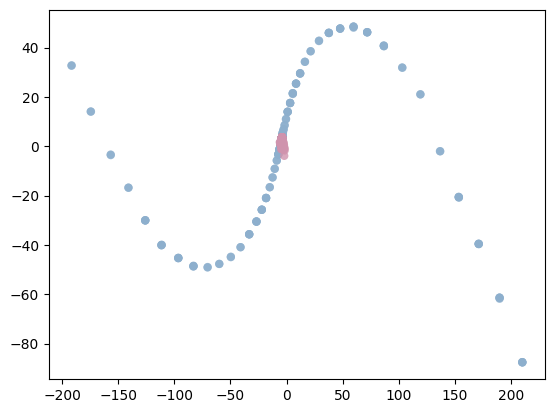

Divergence: 4048.6416015625
Baseline: 0.0
% Divergence: 404864160.15624994
Expl Var: -1.7579492330551147



Layer: 0
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


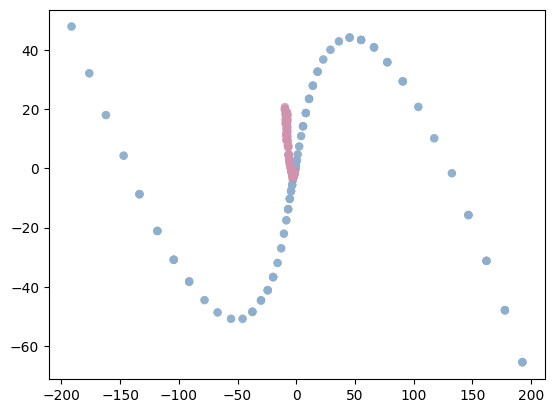

Divergence: 3975.5546875
Baseline: 0.0
% Divergence: 397555468.74999994
Expl Var: -1.082821249961853



Layer: 1
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


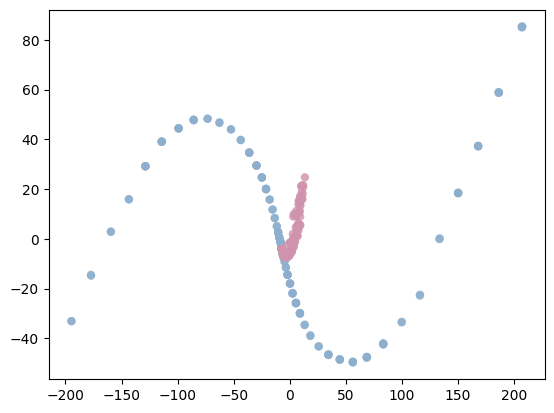

Divergence: 3553.91650390625
Baseline: 0.0
% Divergence: 355391650.390625
Expl Var: -5.821667671203613



Layer: 1
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


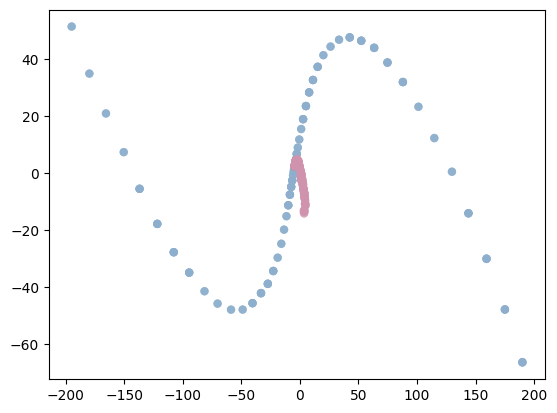

Divergence: 3904.43896484375
Baseline: 0.0
% Divergence: 390443896.48437494
Expl Var: -1.5523797273635864



Layer: 2
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


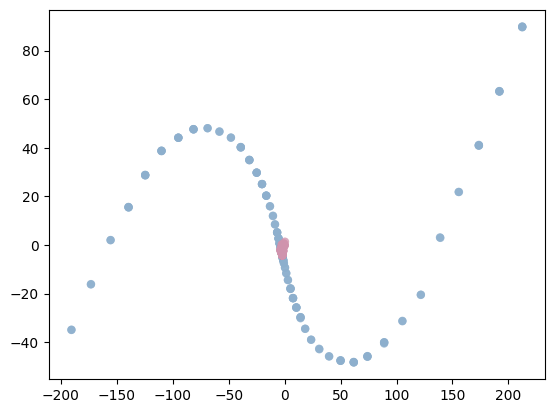

Divergence: 4037.6494140625
Baseline: 0.0
% Divergence: 403764941.40624994
Expl Var: -1.8267706632614136



Layer: 2
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


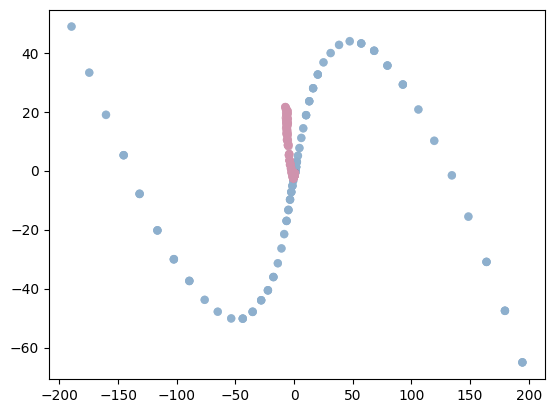

Divergence: 3955.783935546875
Baseline: 0.0
% Divergence: 395578393.55468744
Expl Var: -1.132761001586914



Layer: 3
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


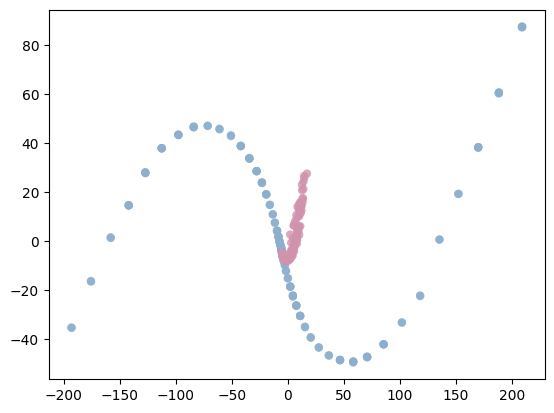

Divergence: 3544.48291015625
Baseline: 0.0
% Divergence: 354448291.015625
Expl Var: -1.5533392429351807



Layer: 3
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


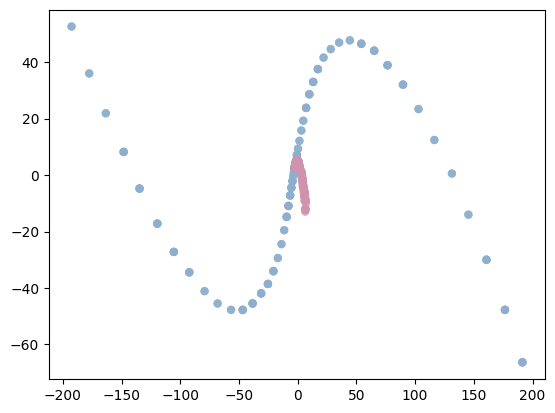

Divergence: 3913.4765625
Baseline: 0.0
% Divergence: 391347656.24999994
Expl Var: -1.3733760118484497



Layer: 4
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


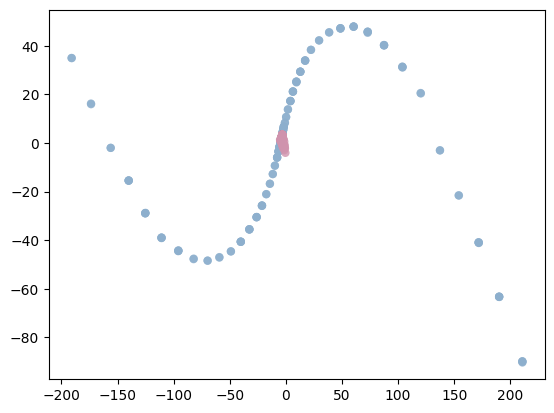

Divergence: 4040.59423828125
Baseline: 0.0
% Divergence: 404059423.82812494
Expl Var: -1.6564260721206665



Layer: 4
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


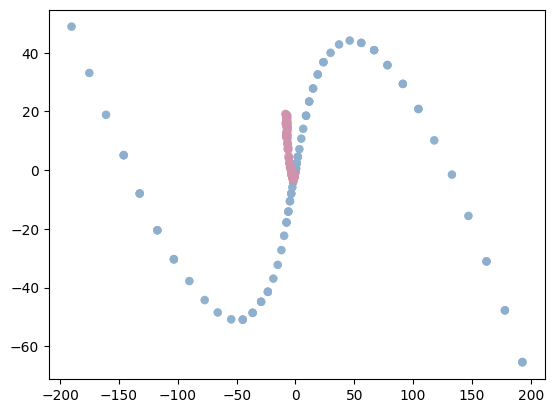

Divergence: 3967.62353515625
Baseline: 0.0
% Divergence: 396762353.51562494
Expl Var: -1.0685920715332031



Layer: 5
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


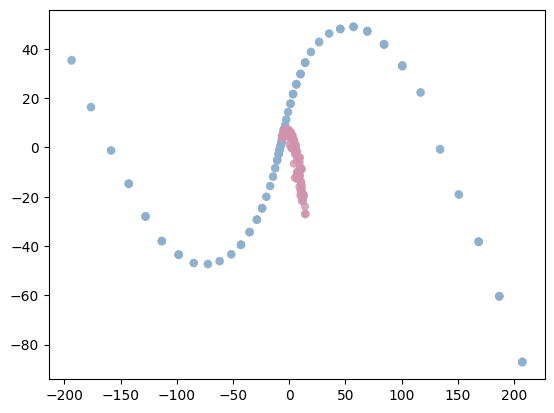

Divergence: 3547.873046875
Baseline: 0.0
% Divergence: 354787304.6875
Expl Var: -3.6477510929107666



Layer: 5
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


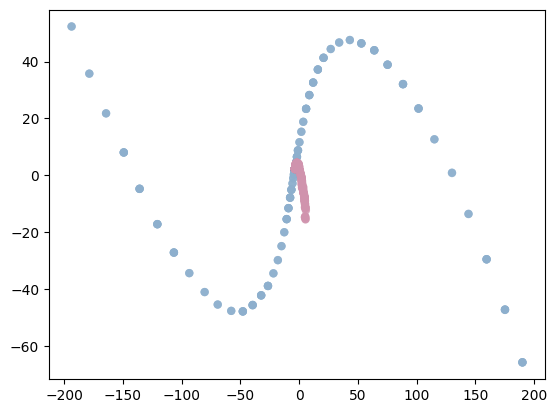

Divergence: 3903.96630859375
Baseline: 0.0
% Divergence: 390396630.85937494
Expl Var: -1.6585676670074463



Layer: 6
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


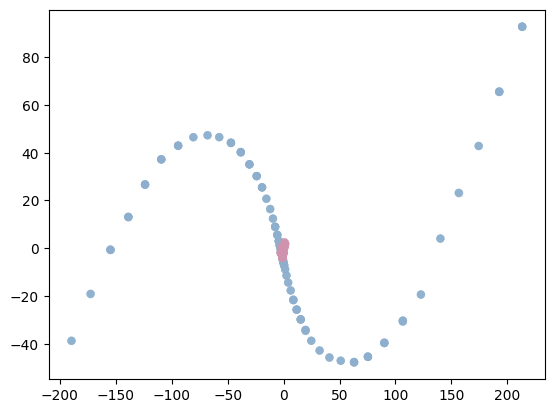

Divergence: 4029.496337890625
Baseline: 0.0
% Divergence: 402949633.78906244
Expl Var: -1.9081339836120605



Layer: 6
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


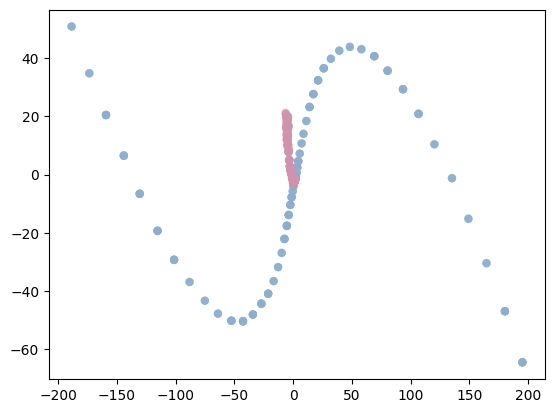

Divergence: 3948.93212890625
Baseline: 0.0
% Divergence: 394893212.89062494
Expl Var: -1.1522815227508545



Layer: 7
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


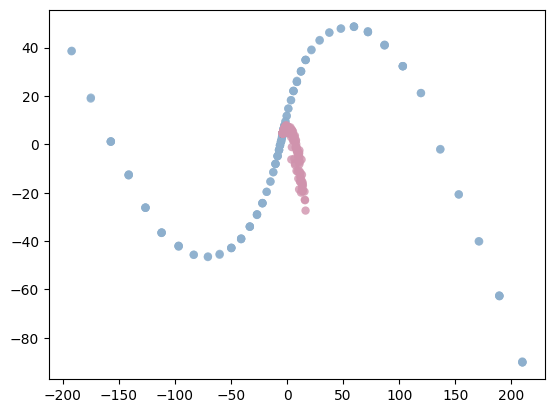

Divergence: 3561.19482421875
Baseline: 0.0
% Divergence: 356119482.421875
Expl Var: -1.437886357307434



Layer: 7
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


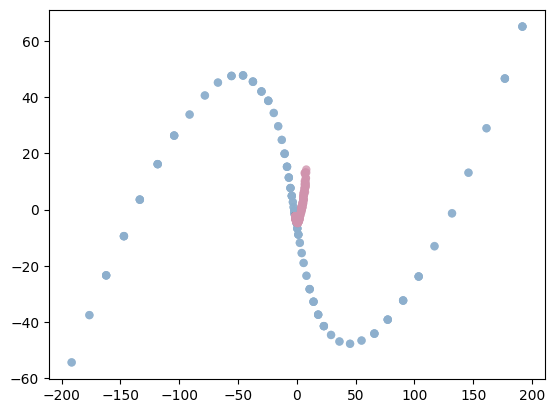

Divergence: 3921.88720703125
Baseline: 0.0
% Divergence: 392188720.70312494
Expl Var: -1.3275755643844604



Layer: 8
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


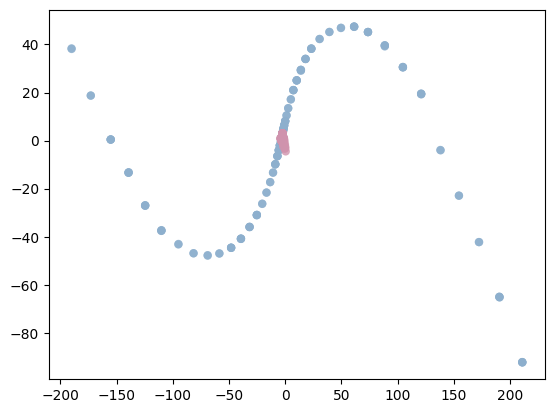

Divergence: 4037.0048828125
Baseline: 0.0
% Divergence: 403700488.28124994
Expl Var: -1.829849123954773



Layer: 8
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


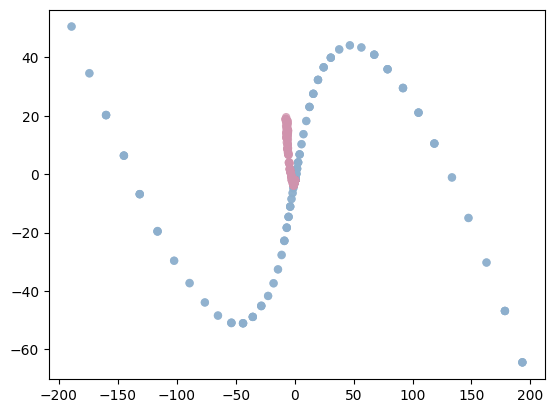

Divergence: 3958.14208984375
Baseline: 0.0
% Divergence: 395814208.98437494
Expl Var: -1.0873643159866333



Layer: 9
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


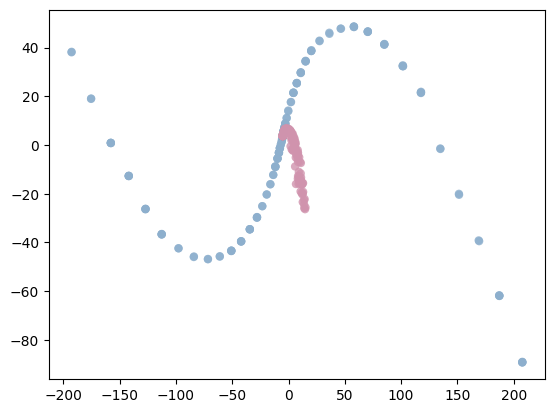

Divergence: 3555.091796875
Baseline: 0.0
% Divergence: 355509179.6875
Expl Var: -2.8343312740325928



Layer: 9
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


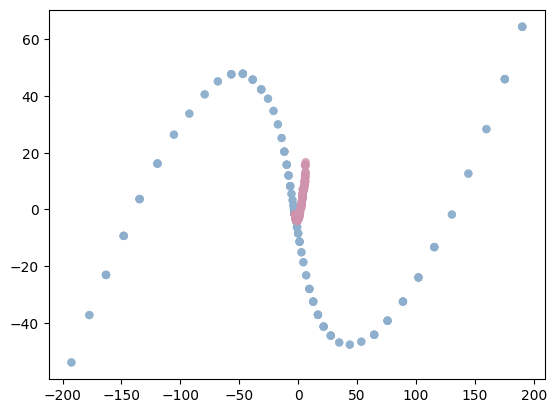

Divergence: 3909.0478515625
Baseline: 0.0
% Divergence: 390904785.15624994
Expl Var: -1.5039629936218262



Layer: 10
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


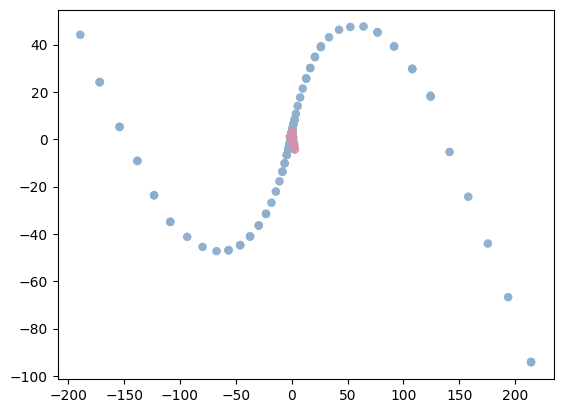

Divergence: 4028.265380859375
Baseline: 0.0
% Divergence: 402826538.08593744
Expl Var: -1.9191322326660156



Layer: 10
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


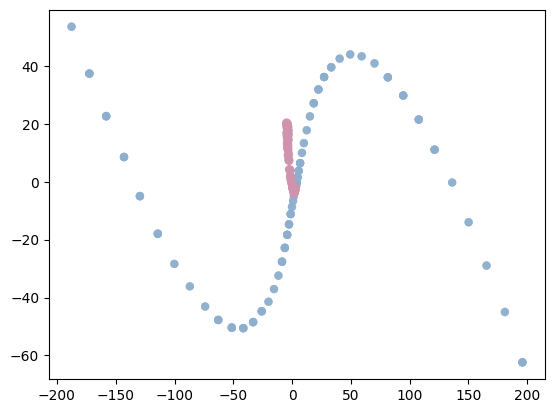

Divergence: 3940.521240234375
Baseline: 0.0
% Divergence: 394052124.02343744
Expl Var: -1.1548806428909302



Layer: 11
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


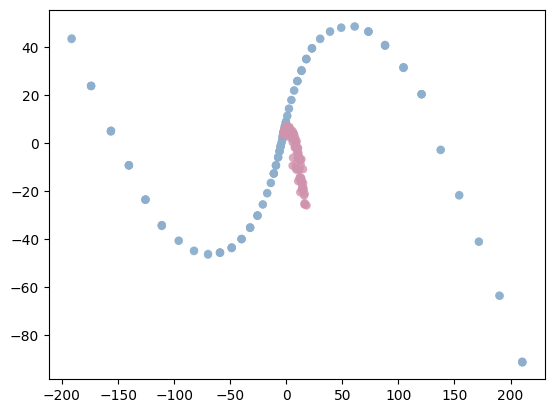

Divergence: 3570.969482421875
Baseline: 0.0
% Divergence: 357096948.2421875
Expl Var: -1.6748048067092896



Layer: 11
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


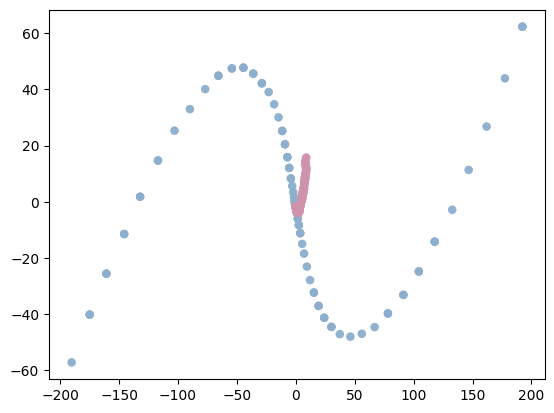

Divergence: 3932.286376953125
Baseline: 0.0
% Divergence: 393228637.69531244
Expl Var: -1.3432321548461914



Layer: 12
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


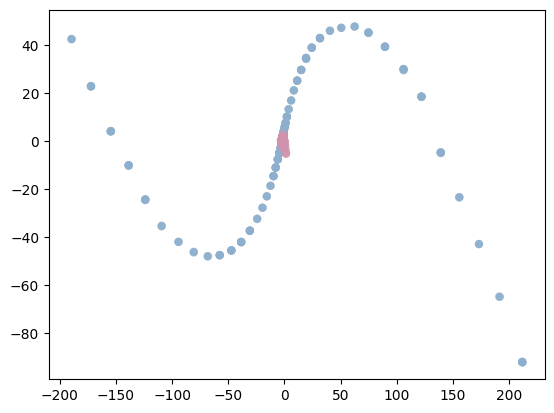

Divergence: 4033.7353515625
Baseline: 0.0
% Divergence: 403373535.15624994
Expl Var: -1.6311155557632446



Layer: 12
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


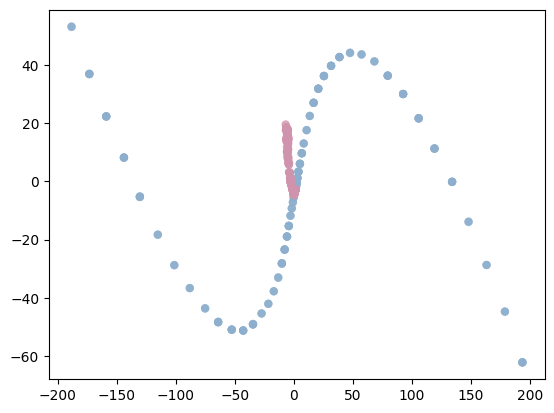

Divergence: 3949.87060546875
Baseline: 0.0
% Divergence: 394987060.54687494
Expl Var: -1.0742374658584595



Layer: 13
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


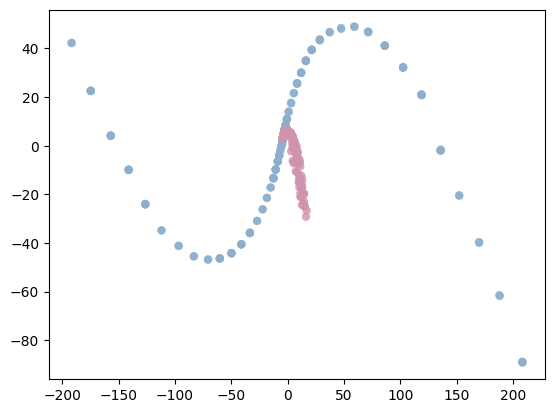

Divergence: 3563.2099609375
Baseline: 0.0
% Divergence: 356320996.09375
Expl Var: -3.3020873069763184



Layer: 13
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


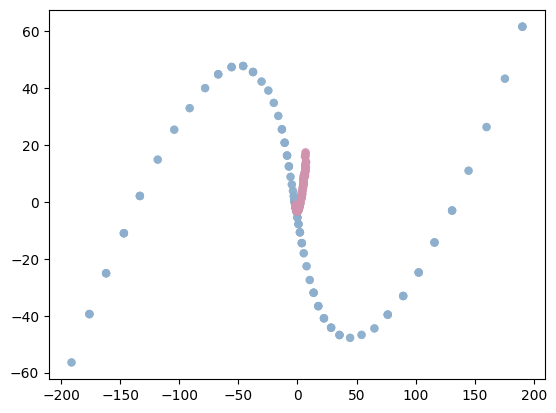

Divergence: 3917.06298828125
Baseline: 0.0
% Divergence: 391706298.82812494
Expl Var: -1.436282992362976



Layer: 14
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


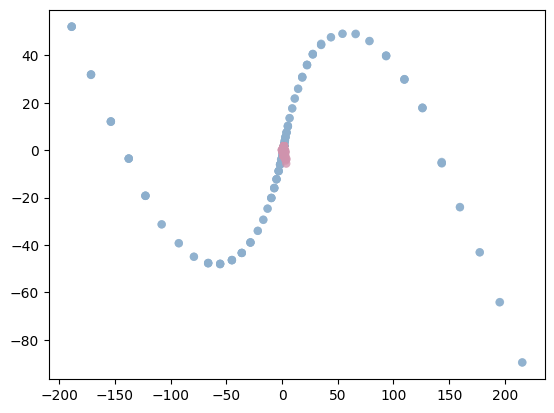

Divergence: 4036.86376953125
Baseline: 0.0
% Divergence: 403686376.95312494
Expl Var: -1.7893896102905273



Layer: 14
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


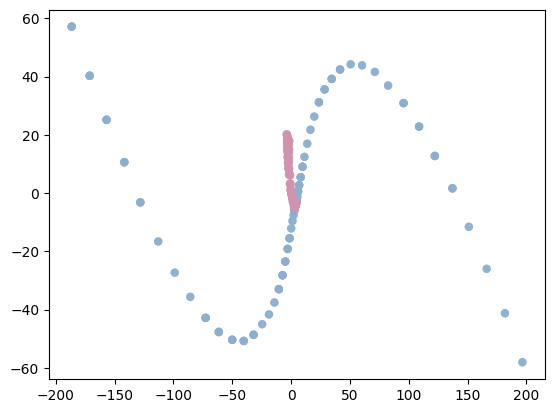

Divergence: 3930.0869140625
Baseline: 0.0
% Divergence: 393008691.40624994
Expl Var: -1.1537448167800903



Layer: 15
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


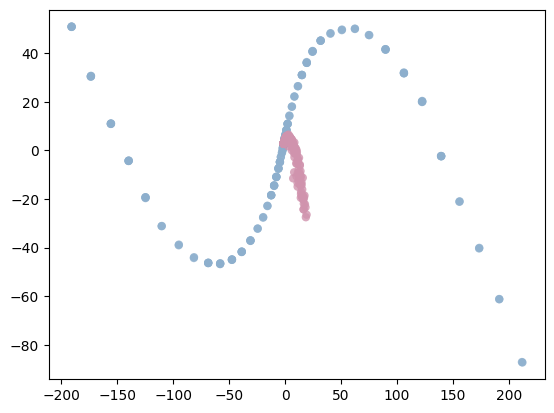

Divergence: 3591.927734375
Baseline: 0.0
% Divergence: 359192773.4375
Expl Var: -2.6579198837280273



Layer: 15
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


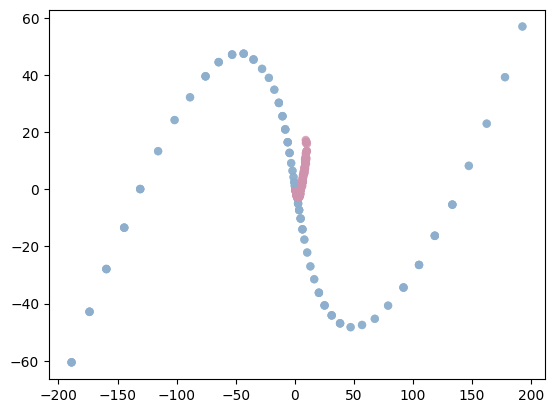

Divergence: 3949.715087890625
Baseline: 0.0
% Divergence: 394971508.78906244
Expl Var: -1.3073265552520752



Layer: 16
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


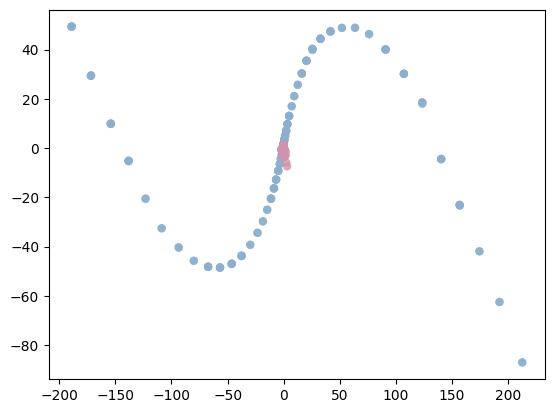

Divergence: 4031.833251953125
Baseline: 0.0
% Divergence: 403183325.19531244
Expl Var: -1.5031126737594604



Layer: 16
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


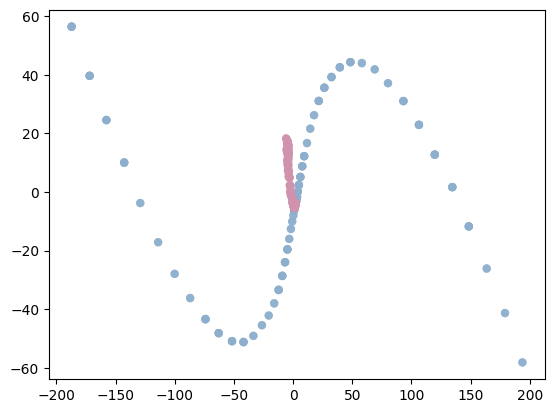

Divergence: 3941.5732421875
Baseline: 0.0
% Divergence: 394157324.21874994
Expl Var: -1.1122740507125854



Layer: 17
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


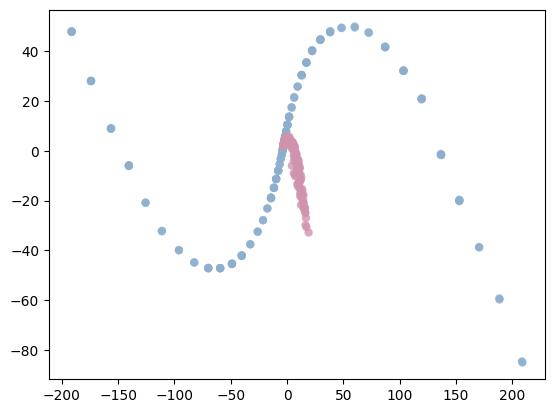

Divergence: 3575.4248046875
Baseline: 0.0
% Divergence: 357542480.46875
Expl Var: -2.349926710128784



Layer: 17
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


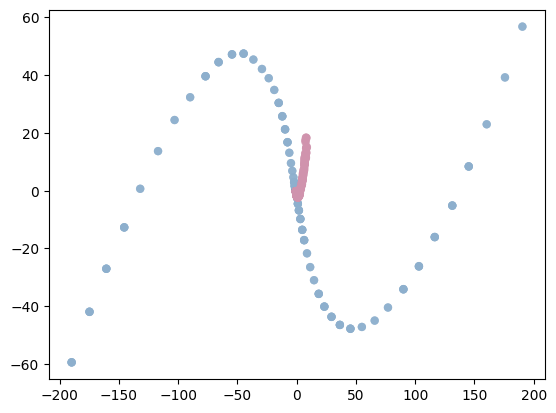

Divergence: 3931.57666015625
Baseline: 0.0
% Divergence: 393157666.01562494
Expl Var: -1.3690447807312012



Layer: 18
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


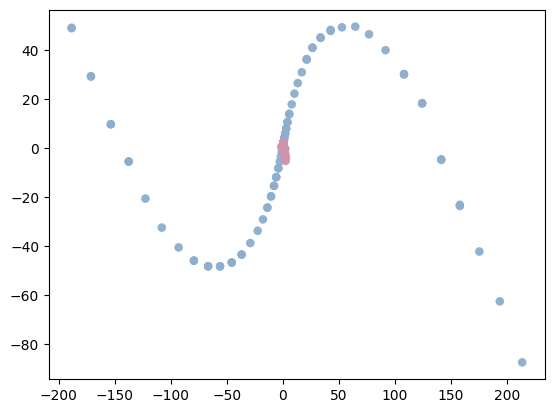

Divergence: 4028.830810546875
Baseline: 0.0
% Divergence: 402883081.05468744
Expl Var: -1.806210994720459



Layer: 18
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


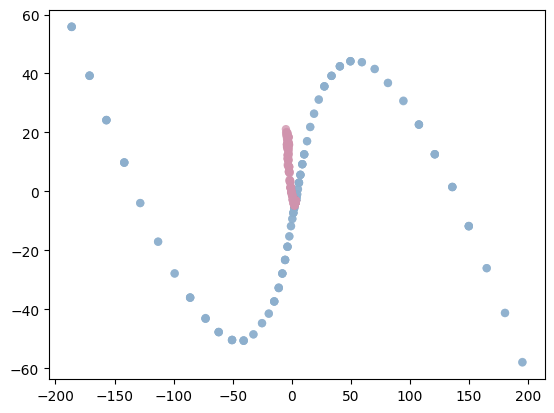

Divergence: 3933.2412109375
Baseline: 0.0
% Divergence: 393324121.09374994
Expl Var: -1.123166799545288



Layer: 19
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


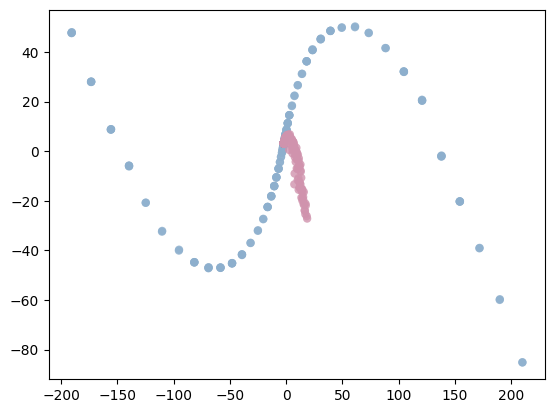

Divergence: 3581.789306640625
Baseline: 0.0
% Divergence: 358178930.6640625
Expl Var: -1.5384231805801392



Layer: 19
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


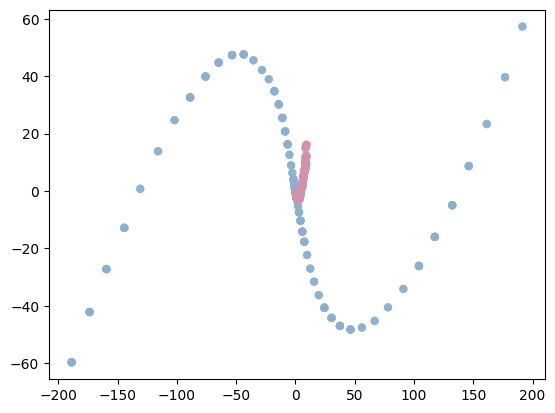

Divergence: 3945.68359375
Baseline: 0.0
% Divergence: 394568359.37499994
Expl Var: -1.3526571989059448



Layer: 20
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


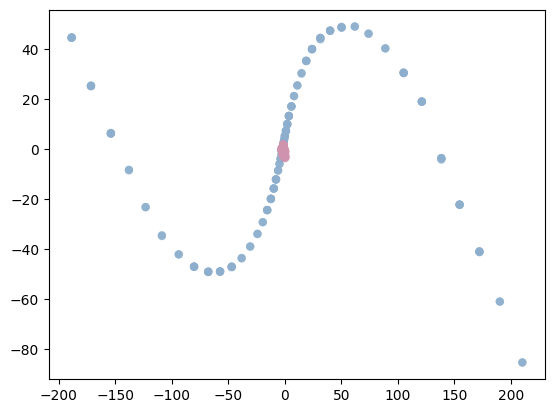

Divergence: 4040.354248046875
Baseline: 0.0
% Divergence: 404035424.80468744
Expl Var: -1.6488597393035889



Layer: 20
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


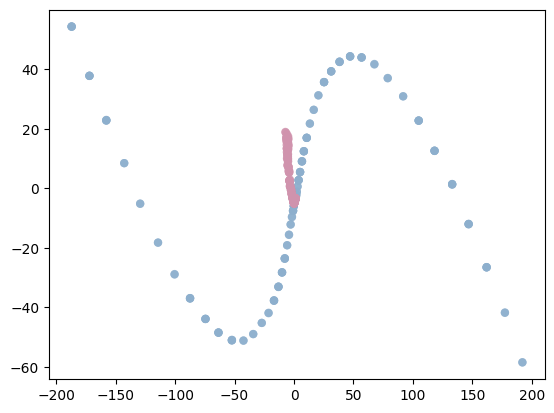

Divergence: 3946.01123046875
Baseline: 0.0
% Divergence: 394601123.04687494
Expl Var: -1.1036200523376465



Layer: 21
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


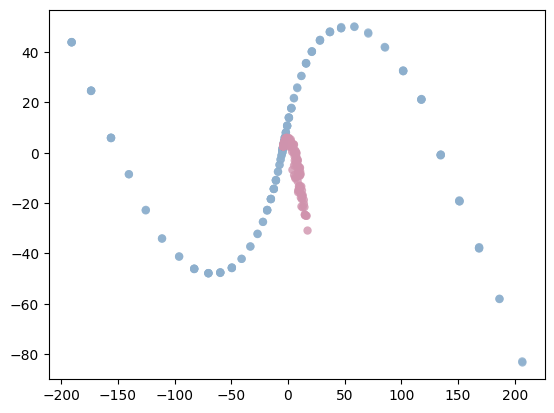

Divergence: 3579.94189453125
Baseline: 0.0
% Divergence: 357994189.453125
Expl Var: -3.741750478744507



Layer: 21
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


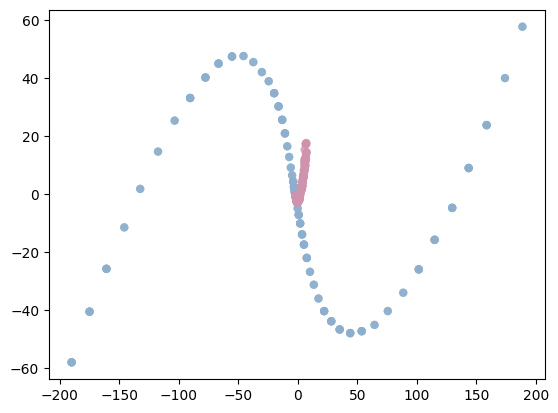

Divergence: 3926.01904296875
Baseline: 0.0
% Divergence: 392601904.29687494
Expl Var: -1.4138706922531128



Layer: 22
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


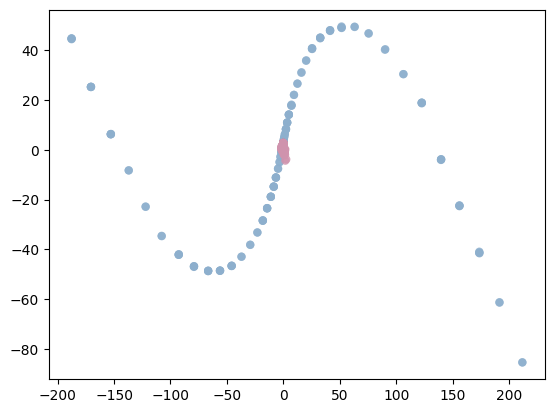

Divergence: 4034.9892578125
Baseline: 0.0
% Divergence: 403498925.78124994
Expl Var: -1.8599046468734741



Layer: 22
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


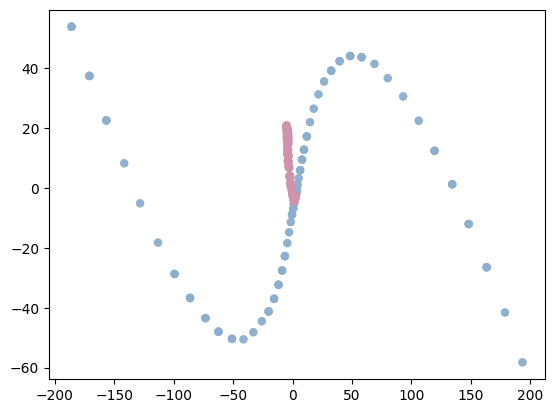

Divergence: 3935.722412109375
Baseline: 0.0
% Divergence: 393572241.21093744
Expl Var: -1.1680058240890503



Layer: 23
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


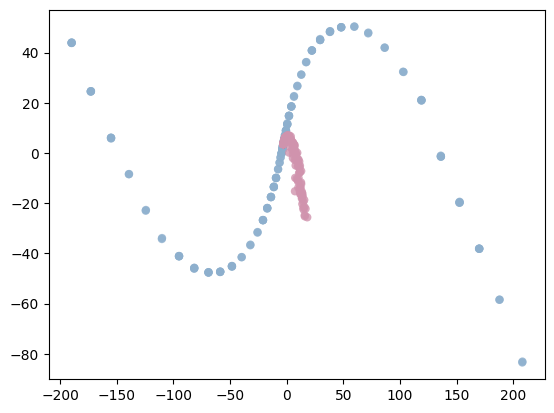

Divergence: 3584.9384765625
Baseline: 0.0
% Divergence: 358493847.65625
Expl Var: -1.5470622777938843



Layer: 23
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


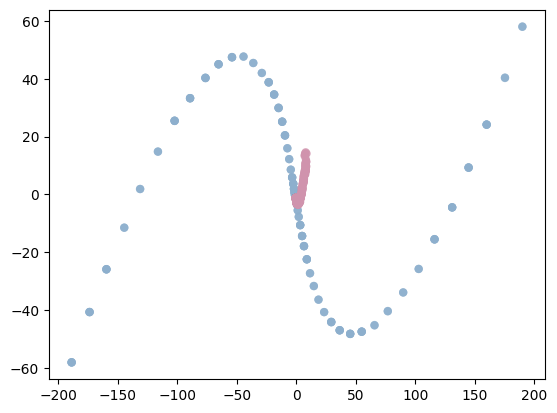

Divergence: 3940.982421875
Baseline: 0.0
% Divergence: 394098242.18749994
Expl Var: -1.4985520839691162



Layer: 24
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


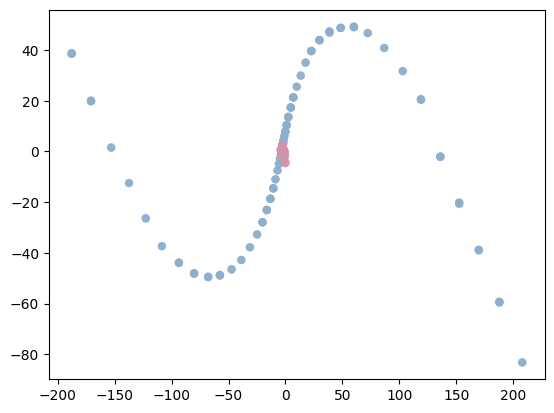

Divergence: 4037.974609375
Baseline: 0.0
% Divergence: 403797460.93749994
Expl Var: -1.6930137872695923



Layer: 24
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


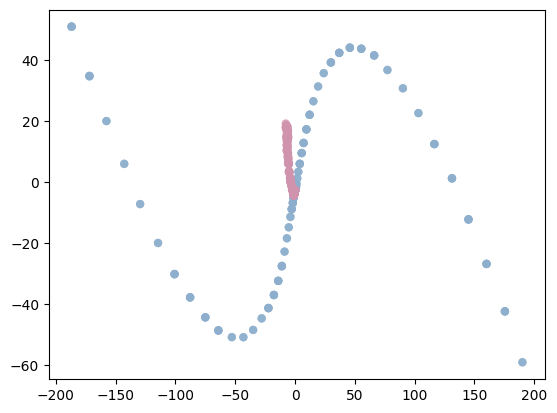

Divergence: 3957.010986328125
Baseline: 0.0
% Divergence: 395701098.63281244
Expl Var: -1.0874714851379395



Layer: 25
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


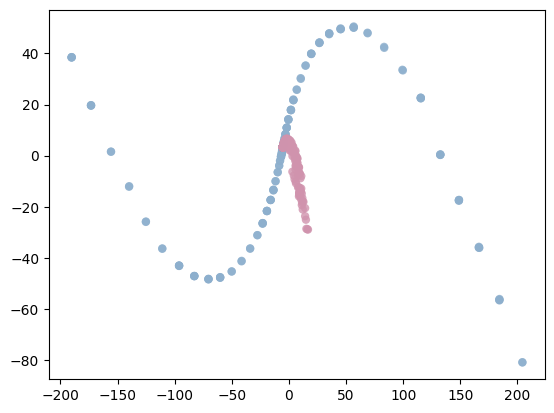

Divergence: 3570.806640625
Baseline: 0.0
% Divergence: 357080664.0625
Expl Var: -2.890488624572754



Layer: 25
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


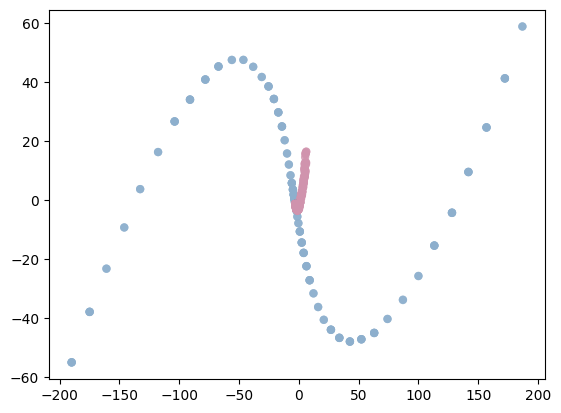

Divergence: 3920.639404296875
Baseline: 0.0
% Divergence: 392063940.42968744
Expl Var: -1.4858266115188599



Layer: 26
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


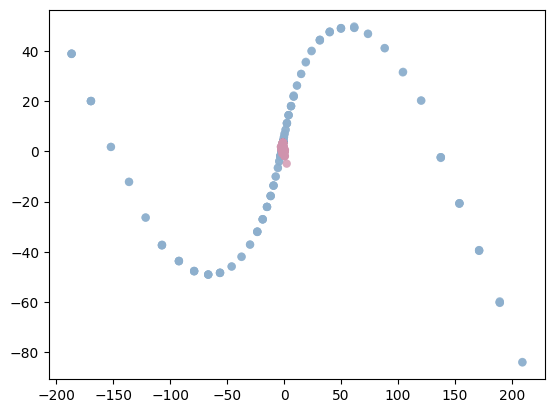

Divergence: 4034.18359375
Baseline: 0.0
% Divergence: 403418359.37499994
Expl Var: -2.063246965408325



Layer: 26
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


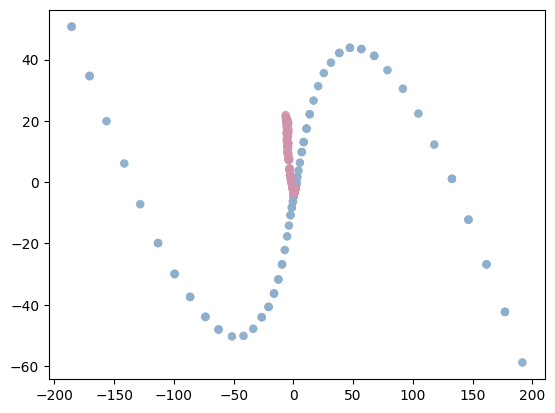

Divergence: 3944.572265625
Baseline: 0.0
% Divergence: 394457226.56249994
Expl Var: -1.1690900325775146



Layer: 27
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


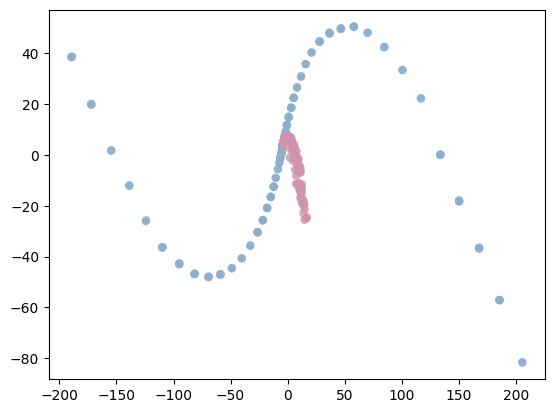

Divergence: 3575.26513671875
Baseline: 0.0
% Divergence: 357526513.671875
Expl Var: -1.4283709526062012



Layer: 27
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


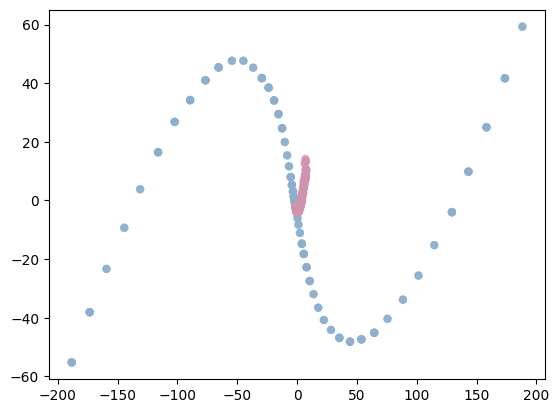

Divergence: 3929.24609375
Baseline: 0.0
% Divergence: 392924609.37499994
Expl Var: -1.357121467590332



Layer: 28
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


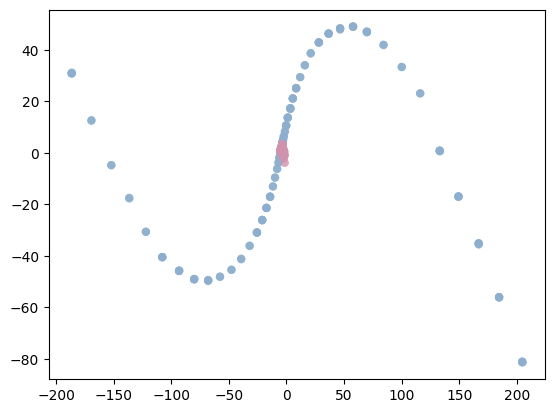

Divergence: 4049.35986328125
Baseline: 0.0
% Divergence: 404935986.32812494
Expl Var: -1.8383945226669312



Layer: 28
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


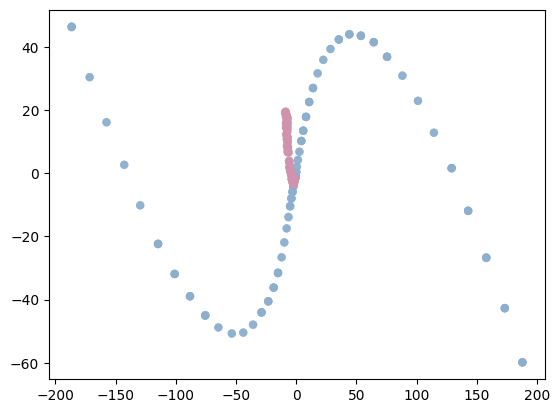

Divergence: 3971.38818359375
Baseline: 0.0
% Divergence: 397138818.35937494
Expl Var: -1.0489585399627686



Layer: 29
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


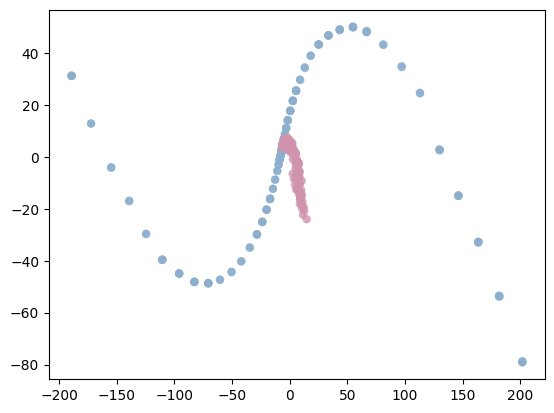

Divergence: 3585.740234375
Baseline: 0.0
% Divergence: 358574023.4375
Expl Var: -3.4631128311157227



Layer: 29
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


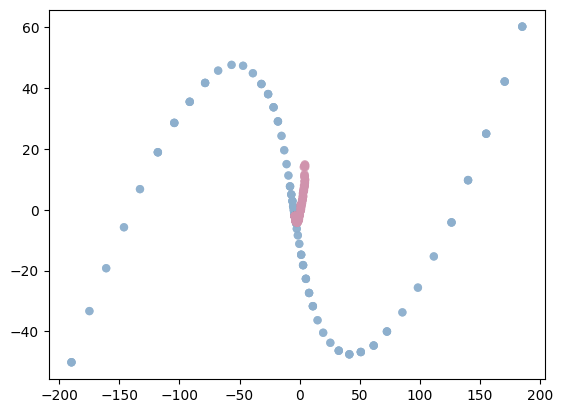

Divergence: 3912.519775390625
Baseline: 0.0
% Divergence: 391251977.53906244
Expl Var: -1.726148247718811



Layer: 30
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


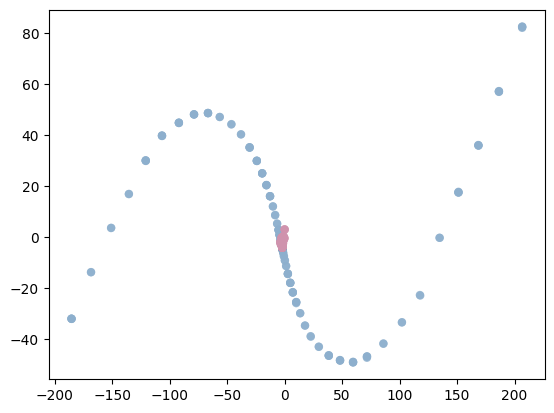

Divergence: 4035.43359375
Baseline: 0.0
% Divergence: 403543359.37499994
Expl Var: -1.7625395059585571



Layer: 30
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


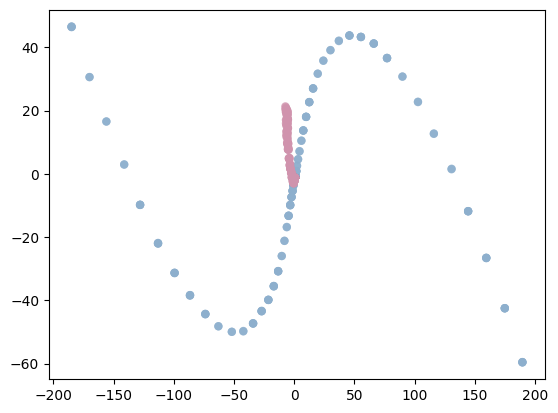

Divergence: 3957.266357421875
Baseline: 0.0
% Divergence: 395726635.74218744
Expl Var: -1.1895968914031982



Layer: 31
Pos Offset: 0
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


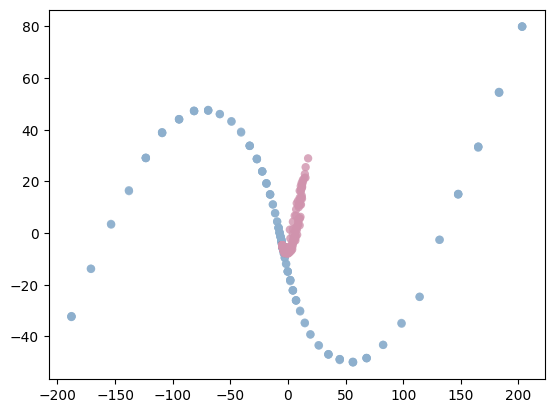

Divergence: 3556.5380859375
Baseline: 0.0
% Divergence: 355653808.59375
Expl Var: -1.8740710020065308



Layer: 31
Pos Offset: 1
Natty PCA


/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=intrv_df, ax=ax, hue=hue, palette=intrv_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="pc0", y="pc1", color=color, alpha=alpha, data=natty_df, ax=ax, hue=hue, palette=native_cmap, edgecolor="none")
/home/grantsrb/src/pyvene_fork/tutorials/advanced_tutorials/plotting_utils.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


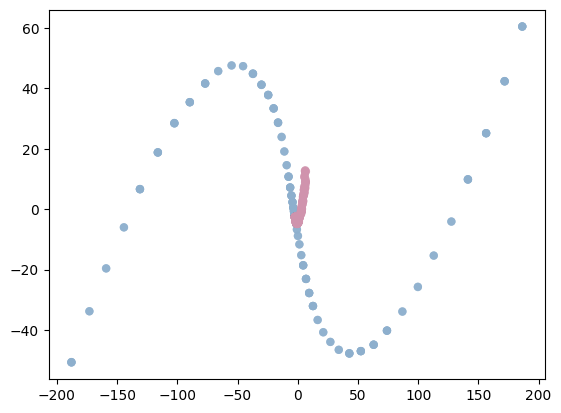

Divergence: 3921.51123046875
Baseline: 0.0
% Divergence: 392151123.04687494
Expl Var: -1.4374781847000122





In [10]:
layer = 0
pos_offset = 0

#for pos_offset in range(20):
for layer in range(0,base_hstates.shape[1]):
    for pos_offset in range(0,base_hstates.shape[2]):
        print("Layer:", layer)
        print("Pos Offset:", pos_offset)
        layers[:] = layer
        rows = torch.arange(len(base_hstates)).long()
        natty_states = base_hstates[rows,layers,positions+pos_offset]
        intrv_states = intrv_hstates[rows,layers,positions+pos_offset]
        print("Natty PCA")
        X = np.concatenate([
            natty_states.clone().detach().cpu().float().numpy(),
            intrv_states.clone().detach().cpu().float().numpy(),
        ], axis=0)
        train_X = X
        mu = train_X.mean(0)
        sig = train_X.std(0)+1e-5
        X = (X-mu)/(sig)
        train_X = (train_X-mu)/(sig)
        pca = PCA()
        pca.fit(train_X)
        
        vecs = pca.transform(X)
        natty_vecs = torch.tensor(vecs[:len(natty_states)])
        intrv_vecs = torch.tensor(vecs[len(natty_states):])
        
        natty_df = {
            "pc0": natty_vecs[:,0],
            "pc1": natty_vecs[:,1],
            "hue": np.ones_like(natty_vecs[:,1]),
        }
        intrv_df = {
            "pc0": intrv_vecs[:,0],
            "pc1": intrv_vecs[:,1],
            "hue": np.ones_like(natty_vecs[:,1]),
        }
        
        
        interleave_scatter(
            natty_df,
            intrv_df,
            hue=None,
            title="", #f"Neural Space {varb}",
            incl_legend=False,
            #save_name=os.path.join(
            #    "./", f"attn_head_deviation.png",
            #)
        )
        
        perm = torch.randperm(len(natty_vecs)).long()
        div = get_emd(natty_vecs, intrv_vecs)
        baseline = get_emd(natty_vecs[perm[:len(natty_vecs)//2]], natty_vecs[perm[len(natty_vecs)//2:]]) 
        baseline = get_emd(natty_vecs, natty_vecs) 
        div_fraction = (div-baseline)/(baseline+1e-5)
        ev = explained_variance(natty_vecs, intrv_vecs).mean().item()
        print("Divergence:", div)
        print("Baseline:", baseline)
        print("% Divergence:", div_fraction)
        print("Expl Var:", ev)
        print()
        print()
        print()
        
        